#### Import Statements

In [33]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [34]:
# Read CSV from 
features_df = pd.read_csv('playlist.csv')

In [35]:
audio_features= features_df[['danceability','energy','acousticness','instrumentalness','liveness','valence','loudness','mode','tempo','key','duration_ms','time_signature','speechiness']]

## Data Exploration

Plotting correlation to see if any positive or negative correlation between audio features.

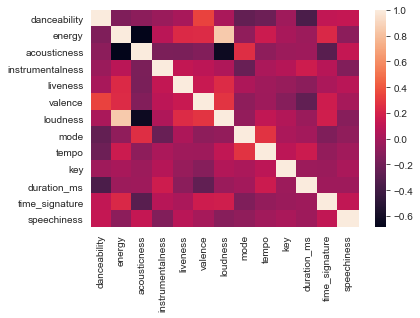

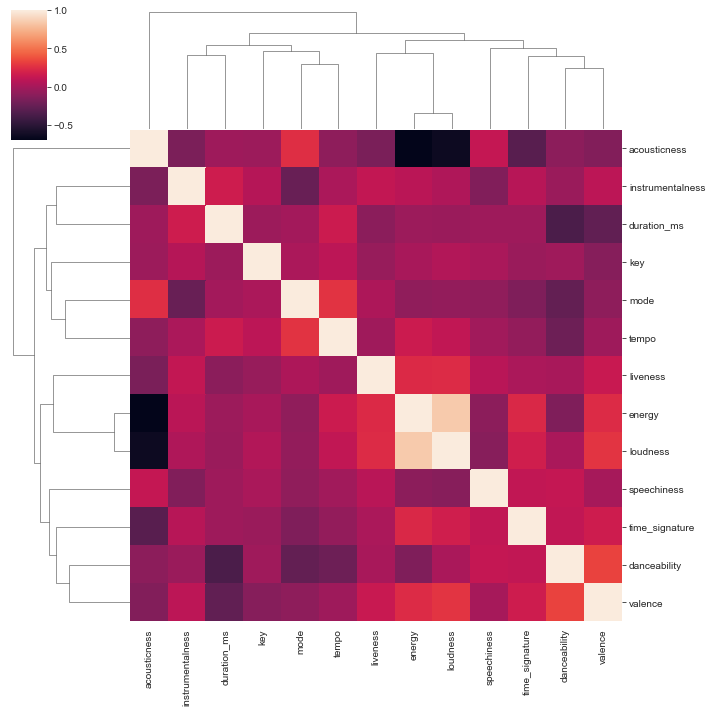

In [38]:
sns.set_style('darkgrid')
sns.heatmap(audio_features.corr())
sns.clustermap(audio_features.corr()) 

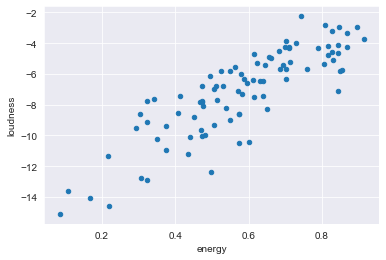

In [18]:
audio_features.plot(kind='scatter', x='energy', y='loudness')

There is a strong, positive correlation between the energy and loudness feature. This seems to be the only 2 variables that are highly correlated.

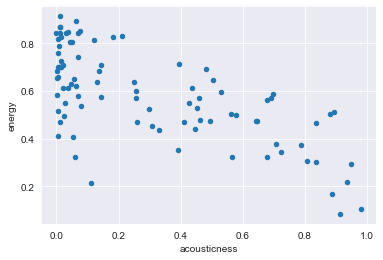

In [54]:
audio_features.plot(kind='scatter', x='acousticness', y='energy')

There is a strong, negative correlation between energy and acousticness. 

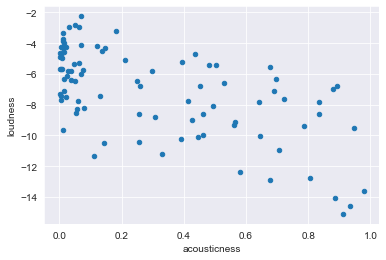

In [55]:
audio_features.plot(kind='scatter', x='acousticness', y='loudness')

There is a strong, negative correlation between loudness and acousticness. 

## Data Modeling

In the below code, I will transform all numeric features using minMaxScaler. I will run the k-means algorithm and use the elbow method to identify the most ideal number of clusters. I then run the k-means algorithm to group the music into playlists based on the audio features.

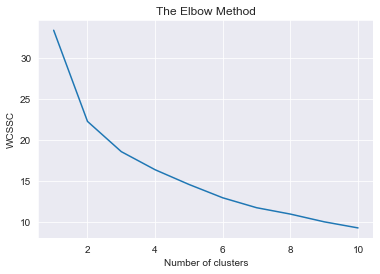

In [57]:
#col_features = ['danceability','energy','acousticness','instrumentalness','liveness','valence','loudness','mode','tempo','key','time_signature','speechiness']
col_features = ['danceability', 'energy', 'valence', 'loudness','acousticness', 'instrumentalness','liveness']
            
X = MinMaxScaler().fit_transform(features_df[col_features])
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++',
                    max_iter = 300,
                    n_init = 10,
                    random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSSC')
plt.show()

In [58]:
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(X)

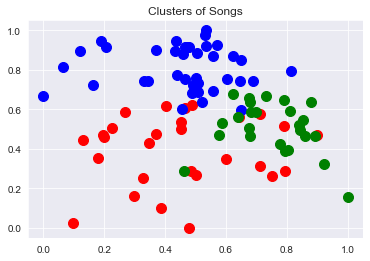

In [59]:
#6 Visualising the clusters
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')

#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Songs')
plt.show()

In [60]:
features_df['kmeans_group'] = list(kmeans.labels_)
features_df = features_df.astype({'kmeans_group': str})
features_df.head()

,Unnamed: 0,id,title,first_artist,all_artists,danceability,speechiness,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,kmeans_group
0,0,4k3uABcX9iaGlt5pRJhumi,stupid,Tate McRae,['Tate McRae'],0.673,0.0416,0.5800,0,-6.029,0,0.0692,0.000085,0.1860,0.2570,95.989,172916,4,1
1,1,4PvbbMYL4fkToni5BLaYRb,Softly,Clairo,['Clairo'],0.759,0.0419,0.4360,0,-11.233,0,0.3300,0.011300,0.1020,0.7820,94.030,185307,4,2
2,2,4CxFN5zON70B3VOPBYbd6P,you were good to me,Jeremy Zucker,"['Jeremy Zucker', 'Chelsea Cutler']",0.561,0.0404,0.0848,2,-15.099,1,0.9130,0.000026,0.1120,0.2060,102.128,219147,4,0
3,3,7qwt4xUIqQWCu1DJf96g2k,Hello?,Clairo,"['Clairo', 'Rejjie Snow']",0.839,0.0607,0.4730,10,-7.835,0,0.6410,0.000459,0.0939,0.0644,98.732,135016,4,0
4,4,5kcvBnt6DPX3AMEsCx1qDh,Happiest Year,Jaymes Young,['Jaymes Young'],0.501,0.0484,0.1670,1,-14.061,1,0.8850,0.000000,0.1110,0.3560,112.275,228443,3,0


In [45]:
cluster_0 = features_df[features_df['kmeans_group']=='0']
cluster_1  = features_df[features_df['kmeans_group']=='1']
cluster_2  = features_df[features_df['kmeans_group']=='2']

In [46]:
features_df[features_df['kmeans_group'] == '0'].describe()

,Unnamed: 0,danceability,speechiness,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,45.750000,0.543250,0.100811,0.411386,5.178571,-9.717500,0.750000,0.669214,0.002548,0.110514,0.304593,112.020000,225477.678571,3.821429
std,26.928747,0.145076,0.143574,0.146894,3.830226,2.685402,0.440959,0.215182,0.006573,0.060574,0.187636,30.798552,51935.091399,0.390021
min,2.000000,0.309000,0.025600,0.084800,0.000000,-15.099000,0.000000,0.255000,0.000000,0.047300,0.061300,64.491000,135016.000000,3.000000
25%,27.250000,0.436250,0.039650,0.319000,1.000000,-11.302250,0.750000,0.513250,0.000000,0.085075,0.156000,92.691500,194683.000000,4.000000
50%,45.500000,0.543500,0.051950,0.460000,6.000000,-9.261500,1.000000,0.687500,0.000006,0.100400,0.238000,103.525500,221745.500000,4.000000
75%,65.500000,0.649000,0.059500,0.516250,8.250000,-7.755000,1.000000,0.846250,0.000256,0.113500,0.448000,134.010500,244606.750000,4.000000
max,86.000000,0.839000,0.686000,0.602000,11.000000,-5.560000,1.000000,0.979000,0.030200,0.381000,0.819000,180.297000,416373.000000,4.000000


In [47]:
features_df[features_df['kmeans_group'] == '1'].describe()

,Unnamed: 0,danceability,speechiness,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.0
mean,45.815789,0.546658,0.063326,0.756737,5.078947,-4.919789,0.473684,0.067541,0.025116,0.220158,0.420368,115.306816,222632.342105,4.0
std,25.010112,0.115783,0.051183,0.090846,3.865171,1.414587,0.506009,0.104137,0.072037,0.189680,0.163587,25.580845,28327.690599,0.0
min,0.000000,0.245000,0.025300,0.580000,0.000000,-8.280000,0.000000,0.000168,0.000000,0.023500,0.105000,72.946000,172916.000000,4.0
25%,24.750000,0.531250,0.034650,0.695250,1.250000,-5.701250,0.000000,0.009962,0.000000,0.101000,0.302250,95.967250,204929.000000,4.0
50%,45.500000,0.568500,0.042100,0.750000,6.000000,-4.709000,0.000000,0.021450,0.000003,0.137500,0.384000,115.484000,223493.500000,4.0
75%,65.250000,0.608500,0.063725,0.839750,8.000000,-4.156500,1.000000,0.069425,0.000406,0.330750,0.530500,128.110750,239090.000000,4.0
max,89.000000,0.782000,0.247000,0.914000,11.000000,-2.250000,1.000000,0.481000,0.309000,0.940000,0.841000,194.000000,317693.000000,4.0


In [49]:
features_df[features_df['kmeans_group'] == '2'].describe()

,Unnamed: 0,danceability,speechiness,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.0
mean,42.920000,0.740440,0.087276,0.505840,4.840000,-7.711080,0.280000,0.230247,0.023570,0.195684,0.576940,110.498920,203645.04000,4.0
std,28.808159,0.082767,0.058034,0.106975,3.249102,1.863374,0.458258,0.211095,0.049926,0.166644,0.225779,21.682597,60894.80152,0.0
min,1.000000,0.550000,0.026900,0.216000,0.000000,-11.331000,0.000000,0.004150,0.000000,0.072400,0.090500,63.000000,39640.00000,4.0
25%,19.000000,0.691000,0.039700,0.471000,2.000000,-8.597000,0.000000,0.048300,0.000000,0.101000,0.408000,95.048000,175884.00000,4.0
50%,45.000000,0.759000,0.071400,0.515000,5.000000,-7.673000,0.000000,0.144000,0.000027,0.117000,0.550000,107.014000,193030.00000,4.0
75%,71.000000,0.802000,0.124000,0.574000,6.000000,-6.412000,1.000000,0.412000,0.011300,0.207000,0.767000,125.044000,224681.00000,4.0
max,90.000000,0.905000,0.241000,0.645000,11.000000,-4.729000,1.000000,0.689000,0.177000,0.752000,0.960000,154.022000,364467.00000,4.0


In [50]:
means = pd.DataFrame(index = range(0,3), 
                    columns = list(features_df[features_df['kmeans_group'] == '0'].describe().loc['mean'].index))
means.iloc[0] = features_df[features_df['kmeans_group'] == '0'].describe().loc['mean']
means.iloc[1] = features_df[features_df['kmeans_group'] == '1'].describe().loc['mean']
means.iloc[2] = features_df[features_df['kmeans_group'] == '2'].describe().loc['mean']
means

,Unnamed: 0,danceability,speechiness,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,45.75,0.54325,0.100811,0.411386,5.17857,-9.7175,0.75,0.669214,0.00254784,0.110514,0.304593,112.02,225478,3.82143
1,45.8158,0.546658,0.0633263,0.756737,5.07895,-4.91979,0.473684,0.0675407,0.025116,0.220158,0.420368,115.307,222632,4
2,42.92,0.74044,0.087276,0.50584,4.84,-7.71108,0.28,0.230247,0.0235697,0.195684,0.57694,110.499,203645,4


In [51]:
features_df.sort_values(by = ['kmeans_group', 'first_artist'], axis = 0).reset_index()

,index,Unnamed: 0,id,title,first_artist,all_artists,danceability,speechiness,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,kmeans_group
0,18,18,56tNMp3B93TFDbWRg92qZS,Hide & Seek,Amber Run,['Amber Run'],0.330,0.0320,0.452,9,-8.812,1,0.3060,0.000007,0.0518,0.202,134.762,281907,4,0
1,78,78,54xkm36HB6FFUAFcguhVVr,The Weight,Amber Run,['Amber Run'],0.309,0.0351,0.107,9,-13.628,1,0.9790,0.000000,0.1010,0.153,86.896,247507,4,0
2,23,23,6zwDfl5TPs8VO0KxiCipJN,Dirty Rooms,Anthony Russo,['Anthony Russo'],0.543,0.6860,0.498,6,-12.359,0,0.5790,0.000000,0.0473,0.472,78.193,221551,4,0
3,67,67,2VlLbhGLVJgdOW7kKdWWFc,Six Feet Under,Billie Eilish,['Billie Eilish'],0.576,0.0428,0.307,11,-12.732,0,0.8070,0.000355,0.0792,0.157,67.513,189613,4,0
4,65,65,4V6MRo0CEAC9MwAm7dkPuL,Real Friends,Camila Cabello,['Camila Cabello'],0.740,0.1170,0.303,3,-8.612,1,0.8350,0.000000,0.0782,0.819,91.958,213933,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,37,37,7GdwIsiVLKrsvwFsdBK9Cy,Something About Us - Recorded at Spotify Studi...,Saint Motel,['Saint Motel'],0.780,0.0385,0.574,7,-10.481,0,0.1440,0.012300,0.1080,0.391,100.008,243163,4,2
87,21,21,5fo4LbJ8lOaB54wcM5wPMv,Come First,Terror Jr,['Terror Jr'],0.905,0.1600,0.216,5,-11.331,0,0.1110,0.000597,0.0911,0.392,95.048,171845,4,2
88,26,26,6GEKs9xvD2Q2hmBN1wkss2,Something Real,blackbear,['blackbear'],0.692,0.0421,0.471,8,-9.642,1,0.0128,0.000000,0.1710,0.592,125.032,170880,4,2
89,45,45,23xup5SPK9QGT5Rs5qUzOm,wish u the best,blackbear,"['blackbear', 'Stalking Gia']",0.802,0.1880,0.495,2,-6.154,0,0.0232,0.000000,0.0933,0.470,114.991,154452,4,2


In [53]:
cluster_0.to_csv("cluster0.csv",index=False)
cluster_1.to_csv("cluster1.csv",index=False)
features_df.to_csv("df.csv",index=False)